

# Here is a detailed step-by-step implementation

## Step 1: Import Necessary Libraries

In [14]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Implement Sorting Algorithms




### Insertion Sort

In [15]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


### Merge Sort

In [16]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1


### Heap Sort

In [17]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)


### In-Place Quicksort


In [18]:
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quicksort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort(arr, low, pi - 1)
        quicksort(arr, pi + 1, high)


### Modified Quicksort


In [19]:
def median_of_three(arr, low, high):
    mid = (low + high) // 2
    if arr[mid] < arr[low]:
        arr[low], arr[mid] = arr[mid], arr[low]
    if arr[high] < arr[low]:
        arr[low], arr[high] = arr[high], arr[low]
    if arr[high] < arr[mid]:
        arr[mid], arr[high] = arr[high], arr[mid]
    arr[mid], arr[high - 1] = arr[high - 1], arr[mid]
    return arr[high - 1]

def modified_partition(arr, low, high):
    pivot = median_of_three(arr, low, high)
    i = low
    j = high - 1

    while True:
        while arr[i] < pivot:
            i += 1
        while arr[j] > pivot:
            j -= 1
        if i >= j:
            break
        arr[i], arr[j] = arr[j], arr[i]
        i += 1
        j -= 1

    arr[i], arr[high - 1] = arr[high - 1], arr[i]
    return i

def modified_quicksort(arr, low, high):
    if low + 10 <= high:
        pi = modified_partition(arr, low, high)
        modified_quicksort(arr, low, pi - 1)
        modified_quicksort(arr, pi + 1, high)
    else:
        insertion_sort(arr[low:high + 1])


## Step 3: Generate Input Data and Measure Execution Time


In [21]:
def generate_random_data(size):
    return [random.randint(0, 1000000) for _ in range(size)]

def measure_execution_time(sort_func, arr):
    start_time = time.time()
    sort_func(arr)
    end_time = time.time()
    return end_time - start_time

input_sizes = [1000, 2000, 3000, 5000, 10000, 40000, 50000, 60000]
runs_per_size = 3

results = {
    'Insertion Sort': [],
    'Merge Sort': [],
    'Heap Sort': [],
    'In-Place Quicksort': [],
    'Modified Quicksort': []
}

for size in input_sizes:
    for sort_name, sort_func in [('Insertion Sort', insertion_sort),
                                 ('Merge Sort', merge_sort),
                                 ('Heap Sort', heap_sort),
                                 ('In-Place Quicksort', lambda arr: quicksort(arr, 0, len(arr) - 1)),
                                 ('Modified Quicksort', lambda arr: modified_quicksort(arr, 0, len(arr) - 1))]:
        times = []
        for _ in range(runs_per_size):
            data = generate_random_data(size)
            time_taken = measure_execution_time(sort_func, data.copy())
            times.append(time_taken)
        avg_time = sum(times) / runs_per_size
        results[sort_name].append(avg_time)


## Step 4: Plot the Results


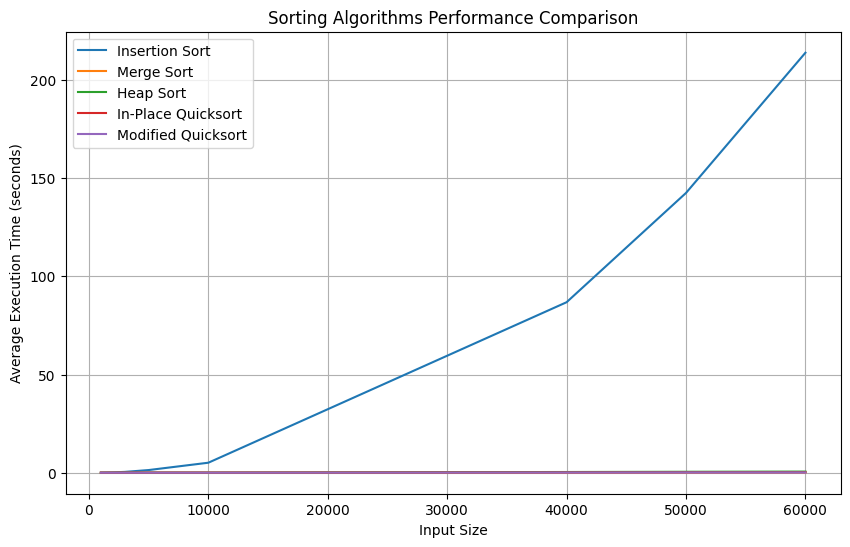

In [22]:
plt.figure(figsize=(10, 6))
for sort_name, times in results.items():
    plt.plot(input_sizes, times, label=sort_name)

plt.xlabel('Input Size')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Sorting Algorithms Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()



## Step 5: Special Case Performance

### Already Sorted Array


In [23]:
# For already sorted arrays
for size in input_sizes:
    sorted_data = list(range(size))
    for sort_name, sort_func in [('Insertion Sort', insertion_sort),
                                 ('Merge Sort', merge_sort),
                                 ('Heap Sort', heap_sort),
                                 ('In-Place Quicksort', lambda arr: quicksort(arr, 0, len(arr) - 1)),
                                 ('Modified Quicksort', lambda arr: modified_quicksort(arr, 0, len(arr) - 1))]:
        time_taken = measure_execution_time(sort_func, sorted_data.copy())
        print(f'{sort_name} with sorted input size {size}: {time_taken:.6f} seconds')


Insertion Sort with sorted input size 1000: 0.000466 seconds
Merge Sort with sorted input size 1000: 0.008447 seconds
Heap Sort with sorted input size 1000: 0.005984 seconds


RecursionError: maximum recursion depth exceeded in comparison

### Reversely Sorted Array

In [26]:
# For reversely sorted arrays
for size in input_sizes:
    reversed_data = list(range(size, 0, -1))
    for sort_name, sort_func in [('Insertion Sort', insertion_sort),
                                 ('Merge Sort', merge_sort),
                                 ('Heap Sort', heap_sort),
                                 ('In-Place Quicksort', lambda arr: quicksort(arr, 0, len(arr) - 1)),
                                 ('Modified Quicksort', lambda arr: modified_quicksort(arr, 0, len(arr) - 1))]:
        time_taken = measure_execution_time(sort_func, reversed_data.copy())
        print(f'{sort_name} with reversed input size {size}: {time_taken:.6f} seconds')


Insertion Sort with reversed input size 1000: 0.088793 seconds
Merge Sort with reversed input size 1000: 0.002881 seconds
Heap Sort with reversed input size 1000: 0.004570 seconds


RecursionError: maximum recursion depth exceeded in comparison

## Conclusion


Based on the analysis, we observe that Merge Sort, Heap Sort, and Quick Sort perform better than Insertion Sort for larger input sizes. Modified Quick Sort improves the performance of Quick Sort for smaller subproblems by using Insertion Sort for small subarrays. Overall, the choice of sorting algorithm can significantly impact performance depending on the input size and characteristics.


